# Proyek Pengembangan Sistem Rekomendasi Buku dengan Collaborative Filtering

Dibuat oleh Sulistyo Chandrianto

## Project Overview
Ilmu pengetahuan sangatlah penting bagi umat manusia. Dari ilmu pengetahuan kita dapat belajar banyak hal dari berbagai sisi kehidupan. Salah satu kunci meningkatkan kualitas hidup kita adalah mengerti akan ilmu pengetahuan tersebut sehingga kita perlu untuk belajar apa ilmu pengetahuan tersebut. Cara mudah untuk mengakses ilmu pengetahuan adalah dengan membaca buku. Dari buku kita dapat membaca tulisan-tulisan gagasan ilmu dari penulis dalam bentuk cerita naratif, cerita bergambar dan lainnya. Kita dapat membaca berbagai hal yang belum pernah kita mengerti sebelumnya.

Sering kita dengar bahwa buku membuka jendela wawasan kita namun sayangnya minat membaca buku di Indonesia sangat kecil. Di tingkat internasional, Indonesia memiliki indeks membaca sebesar 0,001 yang artinya setiap seribu orang hanya satu orang yang memiliki minat baca tinggi [[1](https://journal.unesa.ac.id/index.php/jpi/article/view/140)]. Hal ini berbeda jika dibandingkan dengan negara maju seperti Amerika yang memiliki indeks membaca sebesar 0,45 dan Singapura yang memiliki indeks baca 0,55. Terlihat negara maju memiliki masyrakat dengan minat baca yang tinggi sehingga penting sekali meningkatkan minta membaca ini di Indonesia.

Kesusahan mencari buku yang menarik untuk dibaca merupakan salah satu kendala seseorang untuk memulai membaca buku. Terdapat banyak jenis buku dengan banyak judul yang siap dibaca. Namun seringkali terlewat bigitu saja karena tidak adanya bantuan dalam pemilihan buku tersebut. Hal ini menyebabkan minat seseorang cepat hilang dan menyerah. Maka dari itu kita memerlukan sebuah sistem pendukung untuk mengatasi permasalahan ini.

Sistem pendukung yang bisa digunakan adalah sistem rekomendasi buku. Sistem rekomendasi buku merupakan sistem yang akan merekomendasikan buku sehingga seseorang dapat lebih mudah mendapatkan informasi tentang buku yang akan dibaca [[2](https://ejournal.akprind.ac.id/index.php/technoscientia/article/view/612)]. Sistem rekomendasi ini dibangun berdasarkan sejarah ulasan dari pembaca lainnya sehingga dapat memberikan judul-judul buku yang menarik untuk dibaca. Sistem rekemondasi buku ini diharapkan dapat memberikan bantuan kepada pembaca baru untuk lebih mudah dipertemukan dengan buku yang menarik minta bacanya. Pendekatan yang akan digunakan dalam pengembangan sistem rekemondasi buku adalah *collaborative filtering* yang memerlukan informasi sumber data dari pembaca lainnya.

## Tujuan Proyek
Tujuan dari proyek ini adalah sebagai berikut:

- Mengembangkan sistem rekomendasi buku yang dapat meningkatkan minat baca berdasarkan ulasan pembaca lainnya.
- Memilih metode *collaborative filtering* yang tepat dan akurat untuk pengembangan sistem rekomendasi buku ini.

## Project Startup

* Download library

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811637 sha256=36e09c5fcff47d49052b0712e423507475a87db9a9c5fa0ed57e90e40e6e0f07
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


*   Import library

In [2]:
import pandas as pd
import numpy as np

from surprise import accuracy,SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

*   Load Dataset

In [3]:
books = pd.read_csv('/content/drive/MyDrive/dataset_book/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/dataset_book/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/dataset_book/Ratings.csv')

<ipython-input-3-75d6af7aeac4>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/dataset_book/Books.csv')


## Data Understanding

### Lihat Dataset
Melihat isi dataset dari data books, users dan ratings



* Data books

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


* Data user

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


* Data rating

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Eksplorasi Data

* Bentuk dari dataset

In [7]:
print("Data books memiliki shape :" ,books.shape)
print("Data users memiliki shape :", users.shape)
print("Data ratings memiliki shape :", ratings.shape)

Data books memiliki shape : (271360, 8)
Data users memiliki shape : (278858, 3)
Data ratings memiliki shape : (1149780, 3)


Dari bentuk dataset ditemukan informasi yaitu :
1. Data book memiliki 8 kolom dan 271,360 records
2. Data user memiliki 3 kolom dan 278,858 records
3. Data rating memiliki 3 kolom dan 1,149,780 records

* Info fitur Dataset

In [8]:
books.info()

print('Check null value di data books')
books.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
Check null value di data books


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Dari informasi dataset books tidak ditemukan fitur numerik

In [9]:
users.info()

print('Check null value di data users')
users.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
Check null value di data users


User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.info()

print('Check null value di data ratings')
ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
Check null value di data ratings


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

* Total record dataset dan relasi

In [11]:
n_uniq_book = len(books.ISBN.unique())
n_user = len(users["User-ID"].unique())
n_rating = len(ratings)
n_book_rating = len(ratings["ISBN"].unique())
n_user_rating = len(ratings["User-ID"].unique())

print("Jumlah data buku : ", n_uniq_book)
print("Jumlah data pembaca : ", n_user)
print("Jumlah data rating :", n_rating)
print ("Jumlah pembaca yang memberi rating :", n_user_rating)
print ("Jumlah buku yang diberi rating :", n_book_rating)

Jumlah data buku :  271360
Jumlah data pembaca :  278858
Jumlah data rating : 1149780
Jumlah pembaca yang memberi rating : 105283
Jumlah buku yang diberi rating : 340556


### Eksplorasi Data Univariate

#### Data books

Dilakukan explorasi data univariate terhadap variabel-variabel di dataset books. Variabel yang dipilih untuk dieksplorasi adalah variabel yang dianggap menggambarkan dataset books.

In [12]:
def get_count_percentage(df):
  count_df = df.value_counts()
  percentage = df.value_counts(normalize=True) * 100
  return pd.DataFrame({'jumlah record':count_df, 'persentase':percentage.round(1)})

##### Variabel Year-Of-Publication

In [13]:
df_year = books["Year-Of-Publication"]
df_year_int = df_year[df_year.astype(str).str.isdigit() == True].astype(int)

df_year_pub_info = get_count_percentage(df_year_int)
print(df_year_pub_info)


df_year_words = df_year[~df_year.astype(str).str.isdigit() ]
print('Tahun yang memiliki nilai string adalah ', df_year_words.to_numpy())


print('Tahun yang lebih dari 2023 adalah ', df_year_int[df_year_int.gt(2023)].unique())

      jumlah record  persentase
2002          17627         6.5
1999          17431         6.4
2001          17359         6.4
2000          17232         6.4
1998          15766         5.8
...             ...         ...
1910              1         0.0
1934              1         0.0
1914              1         0.0
1904              1         0.0
2037              1         0.0

[116 rows x 2 columns]
Tahun yang memiliki nilai string adalah  ['DK Publishing Inc' 'Gallimard' 'DK Publishing Inc']
Tahun yang lebih dari 2023 adalah  [2030 2050 2038 2026 2024 2037]


Dari value_count ditemukan informasi sebagai berikut:
* Terdapat tahun terbit yang lebih dari 2023 yaitu tahun terbit 2030,2050,2038,2026,2024,2037
* Terdapat record yang memiliki tahun terbit yang tidak valid yang berisi 'DK Publishing Inc' dan 'Gallimard'

Visualisasi jumlah record terhadap tahun terbit dapat dilihat dibawah ini

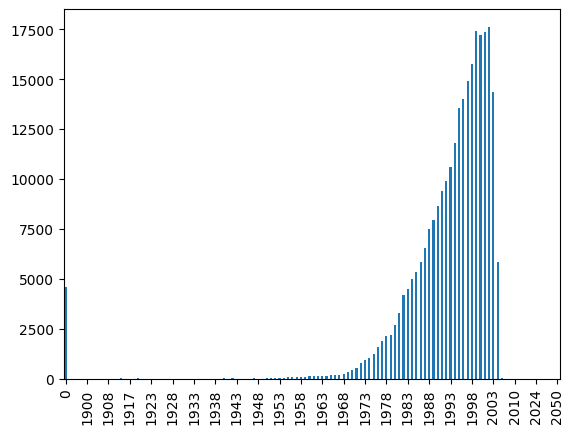

In [14]:
year_min = df_year_int.min()
year_max = df_year_int.max()
n_steps = 500
year_ticks = np.arange(year_min, year_max + 1, n_steps)

ax = df_year_pub_info['jumlah record'].sort_index().plot(kind='bar')
ax.set_xticks(ax.get_xticks()[::5])

Dari grafik diatas terlihat bahwa tahun terbit buku didominasi nilai dengan rentang tahun 1968-2003. Sedangka untuk tahun terbit 0 menunjukkan buku tersebut tidak memiliki informasi tahun terbit.

##### Variabel Book-Author

                      jumlah record  persentase
Agatha Christie                 632         0.2
William Shakespeare             567         0.2
Stephen King                    524         0.2
Ann M. Martin                   423         0.2
Carolyn Keene                   373         0.1
...                             ...         ...
Linda Jackson                     1         0.0
Artiste C. Arthur                 1         0.0
Emily Pearl Kingsley              1         0.0
Jean Cassels                      1         0.0
Christopher  Biffle               1         0.0

[102023 rows x 2 columns]


<Axes: title={'center': '10 Nama Penulis Buku Terbanyak'}>

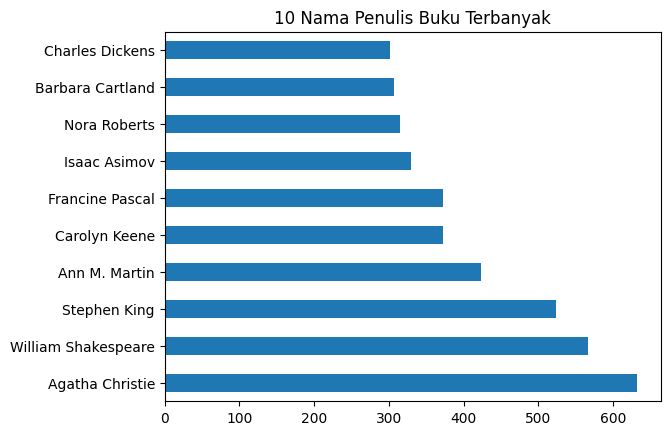

In [15]:
df_author = books["Book-Author"]

df_author_info = get_count_percentage(df_author)
print(df_author_info)

df_author_info['jumlah record'].head(10).plot(kind='barh', title='10 Nama Penulis Buku Terbanyak')

Dari value_count author dan grafik bar author didapatkan informasi untuk dataset ini adalah sebagai berikut:
* Terdapat 102,023 nama penulis buku
* Persentase penulis buku terbesar adalah 0.2 % sehingga dapat disimpulkan value dari Book-Author memiliki keragaman yang sangat banyak dan tidak didominasi oleh penulis buku tertentu
* 3 Penulis buku terbanyak adalah Agatha Christie, William Shakespeare dan Stephen King

##### Variabel Publisher

                         jumlah record  persentase
Harlequin                         7535         2.8
Silhouette                        4220         1.6
Pocket                            3905         1.4
Ballantine Books                  3783         1.4
Bantam Books                      3646         1.3
...                                ...         ...
Hannover House                       1         0.0
Amber Quill Press, LLC.              1         0.0
Lunchbox Press                       1         0.0
Ugly Town                            1         0.0
Connaught                            1         0.0

[16807 rows x 2 columns]


<Axes: title={'center': '10 Nama Publisher Buku Terbanyak'}>

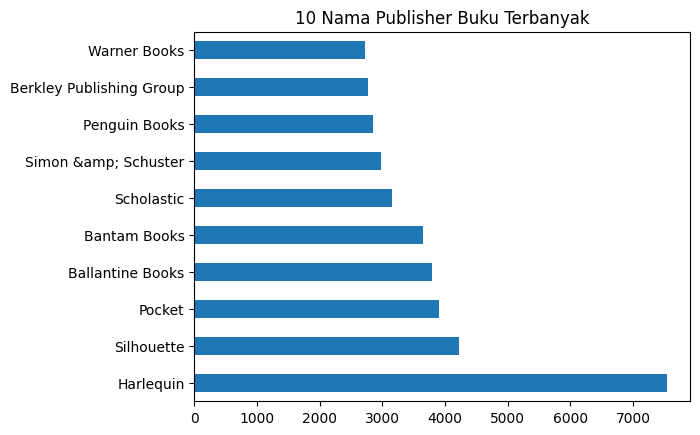

In [16]:
df_publisher = books["Publisher"]

df_publisher_info = get_count_percentage(df_publisher)
print(df_publisher_info)

df_publisher_info['jumlah record'].head(10).plot(kind='barh', title='10 Nama Publisher Buku Terbanyak')

Dari value_count publisher dan grafik bar publisher didapatkan informasi untuk dataset ini adalah sebagai berikut:
* Terdapat 16,807 nama penerbit
* Persentase penerbit buku terbanyak adalah 2.8 % yaitu Harlequin selisih 1% dengan publisher peringkat kedua yaitu Silhouette
* 3 penerbit buku terbanyak adalah Harlequin, Silhouette dan Pocket

#### Data users
Tidak dilakukan eksplorasi data univariate untuk dataset users karena sistem rekomendasi tidak mempertimbangkan data umur dan demografi user

#### Data ratings

##### Variabel Book-Rating

    jumlah record  persentase
0          716109        62.3
8          103736         9.0
10          78610         6.8
7           76457         6.6
9           67541         5.9
5           50974         4.4
6           36924         3.2
4            8904         0.8
3            5996         0.5
2            2759         0.2
1            1770         0.2


<Axes: title={'center': 'Frekuensi jumlah rating'}>

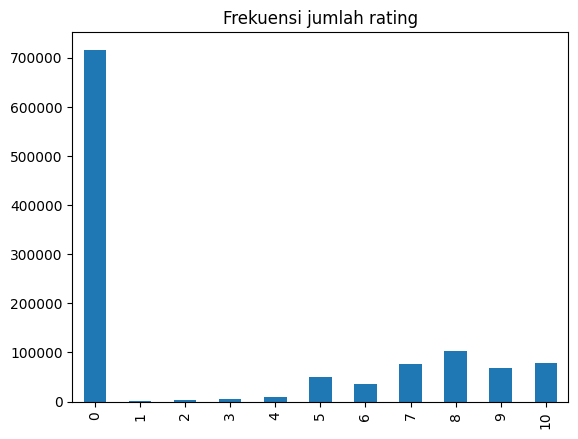

In [17]:
df_rating = ratings["Book-Rating"]

df_rating_info = get_count_percentage(df_rating)
print(df_rating_info)

df_rating_info['jumlah record'].sort_index().plot(kind='bar', title='Frekuensi jumlah rating')

Dari value_count rating dan plot bar frekuensi rating didapatkan informasi sebagai berikut:
* Jumlah pembaca yang belum memberikan penilaian ke buku (rating = 0) masih sangat banyak yaitu sebesar 62%
* Nilai rating yang sering muncul setelah rating 0 adalah rating 8

## Data Preprocessing

Pada tahap Data Preprocessing dilakukan 2 langkah yaitu :
* Penggabungan Data
* Hapus Variabel yang Tidak Digunakan

### Penggabungan Data
Dilakukan penggabungan data books dengan data ratings

In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
merged_book_df = ratings.merge(books, on='ISBN')
merged_book_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


### Hapus Variabel Yang Tidak Digunakan
Menghapus variabel-variabel yang tidak digunakan di pengembangan proyek dengan motode collaborative filtering yaitu
* Image-URL-S
* Image-URL-M
* Image-URL-L
* Book-Title
* Book-Author
* Year-Of-Publication
* Publisher


In [21]:
from sys import breakpointhook
column_to_drop = ['Image-URL-S','Image-URL-M','Image-URL-L','Book-Title','Book-Author','Year-Of-Publication','Publisher']
book_rating_df = merged_book_df.drop(column_to_drop, axis =1)
book_rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,2313,034545104X,5
2,6543,034545104X,0
3,8680,034545104X,5
4,10314,034545104X,9


## Data Preparation
Pada tahap ini akan dilakukan langkah-langkah sebagai berikut:
* Mengatasi Missing Value
* Encoding Data
* Skala Ulang Variabel Book-Rating
* Pembagian Data Uji dan Data Latih

### Mengatasi Missing Value

In [22]:
book_rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Tidak ditemukan missing value di dataset

### Encoding Data
Dilakukan encoding ID untuk ISBN dan User-ID ke dalam indeks integer

In [23]:
user_ids = book_rating_df['User-ID'].unique().tolist()
user_encoded = {x: i for i, x in enumerate(user_ids)}
user_to_user_encoded = {i: x for i, x in enumerate(user_ids)}

book_ids = book_rating_df['ISBN'].unique().tolist()
book_encoded = {x: i for i, x in enumerate(book_ids)}
book_to_book_encoded = {i: x for i, x in enumerate(book_ids)}

print('Encoded user-id :', dict(list(user_encoded.items())[0: 10]))
print('Encoded book-id (isbn) :', dict(list(book_encoded.items())[0: 10]))

Encoded user-id : {276725: 0, 2313: 1, 6543: 2, 8680: 3, 10314: 4, 23768: 5, 28266: 6, 28523: 7, 39002: 8, 50403: 9}
Encoded book-id (isbn) : {'034545104X': 0, '0155061224': 1, '0446520802': 2, '052165615X': 3, '0521795028': 4, '2080674722': 5, '038550120X': 6, '0425115801': 7, '0449006522': 8, '0553561618': 9}


Kemudian memetakan data hasil encode ke dataframe dengan menambahkan kolom baru yaitu kolom user_id dan isbn

In [24]:
book_rating_df['user_id'] = book_rating_df['User-ID'].map(user_encoded)
book_rating_df['isbn'] = book_rating_df['ISBN'].map(book_encoded)
book_rating_df.head()

,User-ID,ISBN,Book-Rating,user_id,isbn
0,276725,034545104X,0,0,0
1,2313,034545104X,5,1,0
2,6543,034545104X,0,2,0
3,8680,034545104X,5,3,0
4,10314,034545104X,9,4,0


### Skala Ulang Variabel Book-Rating
Dilakukan normalisai terhadap variabel Book-Rating yaitu merubah nilai rating menjadi nilai dengan batas skala 0 sampai 1 agar mudah dalam proses training

* Mengubah nilai Book-Rating menjadi float

In [25]:
col_rating = 'Book-Rating'
book_rating_df[col_rating] = book_rating_df[col_rating].values.astype(np.float32)

* Mengambil nilai min dan max Book-Rating

In [26]:
min_rating = min(book_rating_df[col_rating])
max_rating = max(book_rating_df[col_rating])

* Menambahkan variabel baru di dataframe dengan nama rating

In [27]:
book_rating_df['rating'] = book_rating_df[col_rating].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
book_rating_df.head()

,User-ID,ISBN,Book-Rating,user_id,isbn,rating
0,276725,034545104X,0.0,0,0,0.0
1,2313,034545104X,5.0,1,0,0.5
2,6543,034545104X,0.0,2,0,0.0
3,8680,034545104X,5.0,3,0,0.5
4,10314,034545104X,9.0,4,0,0.9


### Pembagian Data Latih dan Data Uji

Membagi data menjadi data uji dan data latih dengan perbandingan 80% data latih dan 20% data uji.

Pembagian data uji dan data latih ini akan dilakukan dengan 2 cara yang berbeda. Hal ini dikarenakan untuk teknik SVD pembagian data uji dan data latih menggunakan modul train_test_split dari library suprise. Berikut masing-masing cara pembagian data uji dan lati.

* Pembagian data uji dan latih untuk teknik SVD

> Di library Surprise terdapat class bernama Reader yang berfungsi untuk membaca file rating. Struktur file rating ini harus mengikuti struktur seperti dibawah ini


  ```
       user ; item ; rating ; [timestamp]
  ```


>  dengan nilai timestamp adalah optional.
 Di class [Reader](https://surprise.readthedocs.io/en/stable/reader.html?highlight=reader) juga terdapat parameter rating_scale yang berfungsi sebagai skala rating dengan default nilai (1,5). Di proyek ini rating_scale akan menggunakan (0,1)


  




In [28]:
reader_svd = Reader(rating_scale=(0,1))
data_svd = Dataset.load_from_df(book_rating_df[['user_id', 'isbn', 'rating']], reader_svd)
trainset_svd, testset_svd = train_test_split(data_svd, test_size=0.2)

* Pembagian data uji dan latih untuk teknik Neural Network

In [29]:
x = book_rating_df[['user_id','isbn']].values
y = book_rating_df['rating'].values

n_train = 0.8
train_indices = int(n_train * book_rating_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[     0      0]
 [     1      0]
 [     2      0]
 ...
 [ 22953 270148]
 [ 22505 270149]
 [ 22505 270150]] [0.  0.5 0.  ... 0.  0.  0.5]


## Modelling

Dalam proyek ini sistem rekomendasi dikembangkan dengan menggunakan metode collaborative filtering. Dari metode ini digunakan dua teknik pendekatan yaitu
* Collaborative filtering dengan teknik SVD
* Collaborative filtering dengan teknik Neural Network

> Untuk keperluan uji coba model dibuat data test buku yang belum dibaca oleh user sesuai dengan nilai User-ID

In [122]:
test_user_id = 276729
read_books = ratings[ratings['User-ID'] == test_user_id]
unread_books =  ratings[~ratings['ISBN'].isin(read_books.ISBN.values)]['ISBN']

### Collaborative Filtering dengan Teknik SVD

SVD (Singular Value Decomposition) merupakan teknik aljabar linear yang digunakan untuk mengurangi dimensi dari matrix. Dengan SVD kita dapat menemukan relasi antar anggota di dalam matrix

Library yang digunakan untuk mengimplementasikan SVD adalah Suprise

In [30]:
svd = SVD()

svd.fit(trainset_svd)

Hasil prediksi model teknik SVD untuk 8 buku yang disarankan

In [106]:
df_svd_predict = unread_books.to_frame(name='ISBN')
df_svd_predict = df_svd_predict.merge(books[['ISBN','Book-Title','Book-Author']], left_on='ISBN', right_on='ISBN', how='left')
df_svd_predict['prediction_rate'] = unread_books.apply(lambda x: svd.predict(test_user_id, x).est)

n_top = 8
df_svd_predict.sort_values(by='prediction_rate',ascending=False).head(n_top)

,ISBN,Book-Title,Book-Author,prediction_rate
0,034545104X,Flesh Tones: A Novel,M. J. Rose,0.28392
766517,0671665871,GOING HOME,Danielle Steel,0.28392
766523,0671690582,WHISPER OF DEATH : WHISPER OF DEATH,Christopher Pike,0.28392
766522,0671690094,ANNE FRANK: DIARY OF A YOUNG GIRL,Anne Frank,0.28392
766521,067167630X,BOOMER,Charles Taylor,0.28392
766520,067167465X,BEST OF ENEMIES (NANCY DREW HARDY BOY SUPERMYS...,Carolyn Keene,0.28392
766519,0671673513,The SILENCE OF THE LAMBS,Thomas Harris,0.28392
766518,0671670662,WEB OF DREAMS (Casteel Saga (Paperback)),V.C. Andrews,0.28392


### Collaborative Filtering dengan Teknik Neural Network

Collaborative filtering dengan teknik Neural Network ini terinspirasi dari siturs [Keras](https://keras.io/examples/structured_data/collaborative_filtering_movielens/) yang menggunakan class RecommenderNet.

* Pertama buat class RecommenderNet dengan keras Model class
  Class ini akan menghitung match score antara user dan book menggunakan dot product kemudian hasil ini ditambahkan dengan bias user dan bias book. Terakhir nilai match score di skala ulang menjadi 0 sampai 1 menggunakan sigmoid activation
  



In [108]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_resto + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

* Buat model
  Membuat model menggunakan BinaryCrossentropy untuk hitung loss function, Adam (Adaptive Momment Estimation) untuk optimizer dan RMSE sebagai metriks evaluasi

In [109]:
embedding_size = 50
num_users = len(book_rating_df['user_id'])
num_books = len(book_rating_df['isbn'])

model_nn = RecommenderNet(num_users, num_books, embedding_size)
model_nn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Hasil prediksi model teknik Neural Network untuk 8 buku yang disarankan

In [127]:
unread_isbns = list(set(unread_books).intersection(set(book_encoded.keys())))
unread_isbns_encode = [[(book_encoded.get(x))] for x in unread_isbns]

user_encoder = user_encoded.get(test_user_id)
user_book_array =  np.hstack(([[user_encoder]] * len(unread_isbns_encode), unread_isbns_encode))

pred_ratings = model_nn.predict(user_book_array).flatten()

8443/8443 [==============================] - 20s 2ms/step


In [141]:
top_ratings_indices = pred_ratings.argsort()[-n_top:][::-1]
recommended_book_isbns = [book_to_book_encoded.get(unread_isbns_encode[x][0]) for x in top_ratings_indices]
df_nn_predict = books[books['ISBN'].isin(recommended_book_isbns)]
df_nn_predict[['ISBN','Book-Title','Book-Author']]

,ISBN,Book-Title,Book-Author
29278,0737020601,Desserts: Delicious Desserts from the 50's (Re...,Susan Wolk
43381,0486229777,Best Ghost Stories of Algernon Blackwood,Algernon Blackwood
63809,0340670363,How to Win at Horse Racing (Teach Yourself: Ho...,Belinda Levez
83891,1864364408,The Last Mortal Generation: How Science Will A...,Damien Broderick
104142,0824521056,Running from the Devil: A Memoir of a Boy Poss...,Steve Kissing
126062,0765305534,Louisiana Lament (Talba Wallis),Julie Smith
263952,0521576814,The Functional Approach to Programming,Guy Cousineau
271079,0425089835,Nice Girls Do,Irene Kassorla


## Evaluation

Evaluasi model menggunakan metriks RMSE (Root Mean Square Error)

In [142]:
rmse = pd.DataFrame(columns=['test'], index=['SVD','NeuralNetwork'])

* Evaluasi collaborative filtering untuk teknik SVD


> Evaluasi menggunakan modul accuracy dari library Surprise



In [143]:
predictions = svd.test(testset_svd)
rmse.loc['SVD','test'] = accuracy.rmse(predictions)

RMSE: 0.3438


* Evaluasi collaborative filtering untuk teknik Neural Network

In [144]:
history = model_nn.fit(
    x = x_train,
    y = y_train,
    batch_size = 500,
    epochs = 8,
    validation_data = (x_val, y_val)
)

Epoch 1/8
1650/1650 [==============================] - 82s 48ms/step - loss: 0.5903 - root_mean_squared_error: 0.3817 - val_loss: 0.6282 - val_root_mean_squared_error: 0.3998
Epoch 2/8
1650/1650 [==============================] - 63s 38ms/step - loss: 0.5982 - root_mean_squared_error: 0.3799 - val_loss: 0.6002 - val_root_mean_squared_error: 0.3775
Epoch 3/8
1650/1650 [==============================] - 63s 38ms/step - loss: 0.6978 - root_mean_squared_error: 0.4136 - val_loss: 0.5859 - val_root_mean_squared_error: 0.3643
Epoch 4/8
1650/1650 [==============================] - 64s 39ms/step - loss: 0.8426 - root_mean_squared_error: 0.4479 - val_loss: 0.5766 - val_root_mean_squared_error: 0.3548
Epoch 5/8
1650/1650 [==============================] - 61s 37ms/step - loss: 0.9262 - root_mean_squared_error: 0.4526 - val_loss: 0.5763 - val_root_mean_squared_error: 0.3507
Epoch 6/8
1650/1650 [==============================] - 65s 39ms/step - loss: 1.1398 - root_mean_squared_error: 0.4919 - val_l

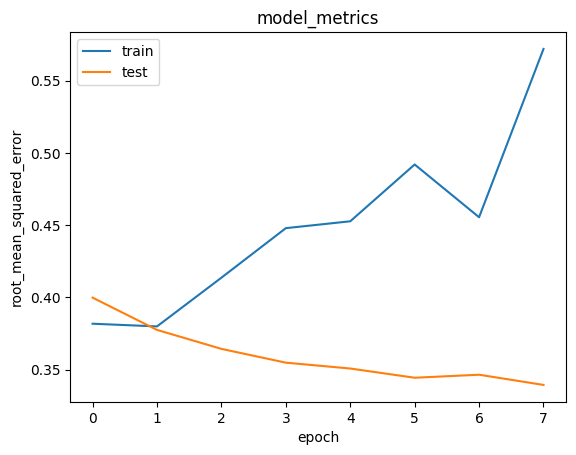

In [145]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mengambil nilai RMSE terkahir dari val_root_mean_squared_error

In [146]:
rmse.loc['NeuralNetwork','test'] = history.history['val_root_mean_squared_error'][-1]

In [147]:
rmse

,test
SVD,0.343799
NeuralNetwork,0.339373


Dilihat dari tabel diatas terlihat bahwa nilai RMSE dengan menggunakan teknik NeuralNetwork lebih kecil. Meskipun hanya memiliki selisih sedikit tetapi di teknik Neural Network masih dapat di tingkatkan lagi dengan mengatur hyperparameter yang lebih baik.

Sehingga teknik Neural Network untuk metode collaborative filtering dipilih sebagai algoritma sistem rekomendasi buku.

## Conclusion

Sistem rekomendasi buku sudah berhasil dibuat dengan metode collaborative filtering dengan teknik Neural Network. Pemilihan teknik Neural Network dipilih berdasarkan parameter RMSE yang lebih kecil.

Meskipun demikian proyek ini kedepannya masih perlu perbaikan dari sisi dataset dan hyperparameter untuk teknik Neural Network.